In [5]:
#import necessary modules
import pandas as pd
import numpy as np 
import os

In [6]:
#Read in CSV file in raw_data directory
cancer_indicators = pd.read_csv('./raw_data/U.S._Chronic_Disease_Indicators__Cancer.csv')

In [7]:
#starting with cancer indicators data...
#review 1st 5 rows of cancer indicators data
cancer_indicators.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2008,2012,NY,New York,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,NaN,Average Annual Number,...,36,CAN,CAN10_2,AVGANNNMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2009,2013,NY,New York,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,NaN,Average Annual Number,...,36,CAN,CAN10_2,AVGANNNMBR,GENDER,GENM,NaN,NaN,NaN,NaN
2,2011,2015,NY,New York,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,NaN,Average Annual Number,...,36,CAN,CAN10_2,AVGANNNMBR,GENDER,GENM,NaN,NaN,NaN,NaN
3,2012,2016,NY,New York,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,NaN,Average Annual Number,...,36,CAN,CAN10_2,AVGANNNMBR,GENDER,GENM,NaN,NaN,NaN,NaN
4,2012,2016,CO,Colorado,Death Certificate,Cancer,"Cancer of the prostate, mortality",NaN,NaN,Average Annual Number,...,8,CAN,CAN11_2,AVGANNNMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


In [8]:
#review cancer indicators dataframe
#displays index, dtype, columns, non-null values, memory usage
cancer_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176339 entries, 0 to 176338
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  176339 non-null  int64  
 1   YearEnd                    176339 non-null  int64  
 2   LocationAbbr               176339 non-null  object 
 3   LocationDesc               176339 non-null  object 
 4   DataSource                 176339 non-null  object 
 5   Topic                      176339 non-null  object 
 6   Question                   176339 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              123091 non-null  object 
 9   DataValueType              176339 non-null  object 
 10  DataValue                  130622 non-null  float64
 11  DataValueAlt               130622 non-null  float64
 12  DataValueFootnoteSymbol    45772 non-null   object 
 13  DatavalueFootnote          45

In [9]:
#.info() shows that several columns contain 0 non-null values, these can deleted
cancer_indicators = cancer_indicators.drop(columns = ["Response", "StratificationCategory2", "Stratification2", 
                        "StratificationCategory3", "Stratification3", "ResponseID",
                        "StratificationCategoryID2", "StratificationID2", 
                        "StratificationCategoryID3", "StratificationID3"])
#Re-run .info() to verify columns with all null values are removed
cancer_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176339 entries, 0 to 176338
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  176339 non-null  int64  
 1   YearEnd                    176339 non-null  int64  
 2   LocationAbbr               176339 non-null  object 
 3   LocationDesc               176339 non-null  object 
 4   DataSource                 176339 non-null  object 
 5   Topic                      176339 non-null  object 
 6   Question                   176339 non-null  object 
 7   DataValueUnit              123091 non-null  object 
 8   DataValueType              176339 non-null  object 
 9   DataValue                  130622 non-null  float64
 10  DataValueAlt               130622 non-null  float64
 11  DataValueFootnoteSymbol    45772 non-null   object 
 12  DatavalueFootnote          45772 non-null   object 
 13  LowConfidenceLimit         90

In [10]:
#Check shape of cancer indicators dataframe, tuple returned with (# of rows, # of columns)
cancer_indicators.shape

(176339, 23)

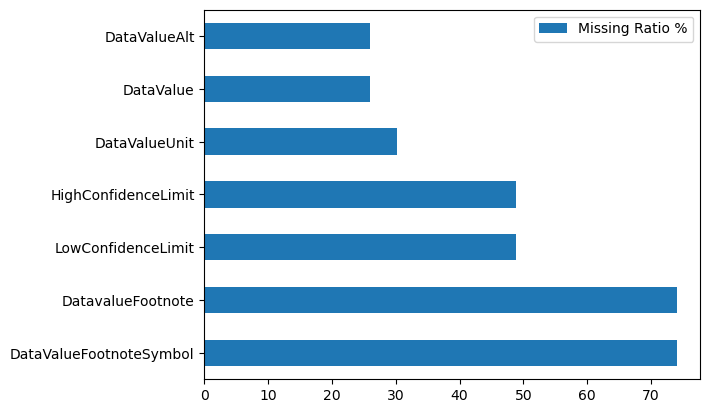

In [11]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
       print('No NAs found')
plot_nas(cancer_indicators)

In [12]:
#Still several columns exist where half or greater of the values are null
#i.e. DataValueFootnoteSymbol, DatavalueFootnote, LowConfidenceLimit, HighConfidenceLimit
#Will leave these columns in here for now

In [13]:
#summary properties of cancer indicators dataframe, include = all will describe all columns regardless of datatype (default is only describe numeric datatype)
cancer_indicators.describe(include = 'all')

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
count,176339.000000,176339.000000,176339,176339,176339,176339,176339,123091,176339,130622.000000,...,90103.000000,90103.000000,176339,176339,176339.000000,176339,176339,176339,176339,176339
unique,NaN,NaN,55,55,3,1,20,2,5,NaN,...,NaN,NaN,3,10,NaN,1,20,5,3,10
top,NaN,NaN,NY,New York,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality","per 100,000",Average Annual Number,NaN,...,NaN,NaN,Race/Ethnicity,Overall,NaN,CAN,CAN10_2,AVGANNNMBR,RACE,OVR
freq,NaN,NaN,3378,3378,79872,176339,9984,106496,53248,NaN,...,NaN,NaN,112530,22553,NaN,176339,9984,53248,112530,22553
mean,2011.881694,2015.505260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1140.048780,...,58.214001,63.725664,NaN,NaN,29.720249,NaN,NaN,NaN,NaN,NaN
std,2.608231,2.323942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13440.187884,...,100.750663,103.744305,NaN,NaN,16.290472,NaN,NaN,NaN,NaN,NaN
min,2008.000000,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,2010.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,...,4.400000,6.300000,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.600000,...,20.800000,24.600000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.000000,...,67.100000,77.900000,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,NaN


In [14]:
#check indexing of cancer_indicators dataframe
cancer_indicators.index

RangeIndex(start=0, stop=176339, step=1)

In [15]:
#Dataframe has 23 columns, let's start looking at each one a little more closely

In [16]:
#YearStart, YearEnd unique values
print(cancer_indicators['YearStart'].unique())
print(cancer_indicators['YearEnd'].unique())

[2008 2009 2011 2012 2013 2015 2014 2010 2018 2020 2016]
[2012 2013 2015 2016 2017 2019 2018 2014 2020]


In [17]:
#Combine values from YearStart, YearEnd columns so Year Range from which each data point was obtained is more readily apparent
cancer_indicators['Timeframe'] = cancer_indicators['YearStart'].astype(str) + '-' + cancer_indicators['YearEnd'].astype(str)
print(cancer_indicators['Timeframe'].unique())

['2008-2012' '2009-2013' '2011-2015' '2012-2016' '2013-2017' '2015-2019'
 '2014-2018' '2010-2014' '2018-2018' '2020-2020' '2015-2015' '2016-2016'
 '2012-2012' '2013-2013' '2014-2014']


In [18]:
#Looks like some of the Timeframe values aren't a range at all but are only looking at 1 year 
#Replaces Timeframe values that only look at a single year to just that year
cancer_indicators.replace(['2012-2012', '2013-2013','2014-2014','2015-2015',
                                               '2016-2016','2018-2018','2020-2020'],
                                              ['2012','2013','2014','2015',
                                                '2016','2018','2020'], inplace = True)

In [19]:
#Verify Timeframe column correctly states single year timeframes & ranges
print(cancer_indicators['Timeframe'].unique())

['2008-2012' '2009-2013' '2011-2015' '2012-2016' '2013-2017' '2015-2019'
 '2014-2018' '2010-2014' '2018' '2020' '2015' '2016' '2012' '2013' '2014']


In [20]:
#Remove YearEnd, YearStart columns from df
cancer_indicators.drop(['YearStart', 'YearEnd'], axis =1, inplace = True)
#Check YearEnd, YearStart columns removed from df, they were so we're good
cancer_indicators.columns

Index(['LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'Question',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID',
       'StratificationCategoryID1', 'StratificationID1', 'Timeframe'],
      dtype='object')

In [21]:
#Review LocationAbbr, LocationDesc, LocationID columns

#From what geographic locations was the data collected?
print(cancer_indicators['LocationAbbr'].unique())

['NY' 'CO' 'DC' 'IN' 'NC' 'NM' 'NV' 'SC' 'VA' 'AL' 'IA' 'ID' 'UT' 'WY'
 'AK' 'CA' 'GA' 'MD' 'OH' 'US' 'HI' 'KS' 'OR' 'WA' 'IL' 'AR' 'MI' 'WV'
 'CT' 'DE' 'NE' 'RI' 'WI' 'NH' 'MS' 'FL' 'VT' 'MO' 'LA' 'ME' 'MT' 'TX'
 'AZ' 'NJ' 'MA' 'ND' 'OK' 'KY' 'MN' 'TN' 'SD' 'PA' 'GU' 'PR' 'VI']


In [22]:
print(cancer_indicators['LocationDesc'].unique())

['New York' 'Colorado' 'District of Columbia' 'Indiana' 'North Carolina'
 'New Mexico' 'Nevada' 'South Carolina' 'Virginia' 'Alabama' 'Iowa'
 'Idaho' 'Utah' 'Wyoming' 'Alaska' 'California' 'Georgia' 'Maryland'
 'Ohio' 'United States' 'Hawaii' 'Kansas' 'Oregon' 'Washington' 'Illinois'
 'Arkansas' 'Michigan' 'West Virginia' 'Connecticut' 'Delaware' 'Nebraska'
 'Rhode Island' 'Wisconsin' 'New Hampshire' 'Mississippi' 'Florida'
 'Vermont' 'Missouri' 'Louisiana' 'Maine' 'Montana' 'Texas' 'Arizona'
 'New Jersey' 'Massachusetts' 'North Dakota' 'Oklahoma' 'Kentucky'
 'Minnesota' 'Tennessee' 'South Dakota' 'Pennsylvania' 'Guam'
 'Puerto Rico' 'Virgin Islands']


In [23]:
print(cancer_indicators['LocationID'].unique())

[36  8 11 18 37 35 32 45 51  1 19 16 49 56  2  6 13 24 39 59 15 20 41 53
 17  5 26 54  9 10 31 44 55 33 28 12 50 29 22 23 30 48  4 34 25 38 40 21
 27 47 46 42 66 72 78]


In [24]:
#Checking the number of unique values in each location related column where data was recorded
print(len(cancer_indicators['LocationDesc'].unique()))
print(len(cancer_indicators['LocationAbbr'].unique()))
print(len(cancer_indicators['LocationID'].unique()))

55
55
55


In [25]:
#Looks like at least each state then a few other locations- let's filter the states out to see other locations included
#states_list = 50 states 
states_list = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", 
               "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", 
               "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", 
               "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", 
               "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", 
               "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", 
               "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", 
               "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
#list of location desc in cancer_indicators dataset
cancer_loc_list = cancer_indicators['LocationDesc'].unique()
#see which other locations where included in sampliing
other_locs_sampled = [i for i in cancer_loc_list if i not in states_list]
print(other_locs_sampled)

['District of Columbia', 'United States', 'Guam', 'Puerto Rico', 'Virgin Islands']


In [26]:
#Data also sampled from District of Columbia & 3 territories- Guam, Puerto Rico, Virgin Islands 
#Some data just generalized to United States country as a whole.
#Would like to limit this data analysis to just the United States- so will delete rows in dataframe
#containing info from territories- Guam, Puerto Rico, & Virgin Islands
cancer_indicators = cancer_indicators.loc[~((cancer_indicators['LocationDesc'] == 'Guam') | 
                                            (cancer_indicators['LocationDesc'] == 'Puerto Rico') | 
                                            (cancer_indicators['LocationDesc'] == 'Virgin Islands'))]
#Verify rows containing data from these locations were removed, the only values not in the states list remaining are 
#United States & District Columbia, which is what we want
cancer_loc_list = cancer_indicators['LocationDesc'].unique()
#see which other locations where included in sampliing
other_locs_sampled = [i for i in cancer_loc_list if i not in states_list]
print(other_locs_sampled)

['District of Columbia', 'United States']


In [27]:
#Understand values in Datasource column
print(cancer_indicators['DataSource'].unique())

['Death Certificate' 'Statewide central cancer registries' 'BRFSS']


In [28]:
#Interesting to know what source the data is coming from but since this is a large dataframe 
#& data is coming from a reputable source (CDC). I don't think this column is necessary
#So I will drop
cancer_indicators.drop('DataSource', axis =1, inplace = True)
#Check DataSource column removed from df. Column was successfully dropped.
cancer_indicators.columns

Index(['LocationAbbr', 'LocationDesc', 'Topic', 'Question', 'DataValueUnit',
       'DataValueType', 'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'Timeframe'],
      dtype='object')

In [29]:
#Review Topic & TopicID columns
print(cancer_indicators['Topic'].unique())
print(cancer_indicators['TopicID'].unique())

['Cancer']
['CAN']


In [30]:
#Look like these columns are just telling us that we are looking at cancer data, which is well-established.
#These columns will be dropped because they don't provide meaningful information
cancer_indicators.drop(['Topic', 'TopicID'], axis=1, inplace = True)
#Check Topic & TopicID columns were removed from df. Columns were successfully dropped.
cancer_indicators.columns

Index(['LocationAbbr', 'LocationDesc', 'Question', 'DataValueUnit',
       'DataValueType', 'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'LocationID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'Timeframe'],
      dtype='object')

In [31]:
#Review Question & QuestionID columns - what questions regarding cancer were surveyed
#Check unique values for each column
ques_list = cancer_indicators['Question'].unique()
print(len(ques_list))
print(ques_list)

ques_IDs = cancer_indicators['QuestionID'].unique()
print(len(ques_IDs))
print(ques_IDs)

20
['Cancer of the oral cavity and pharynx, mortality'
 'Cancer of the prostate, mortality'
 'Invasive cancer (all sites combined), mortality'
 'Cancer of the female breast, mortality'
 'Cancer of the female cervix, mortality'
 'Cancer of the colon and rectum (colorectal), mortality'
 'Cancer of the lung and bronchus, mortality'
 'Invasive melanoma, incidence' 'Melanoma, mortality'
 'Invasive cancer of the oral cavity or pharynx, incidence'
 'Invasive cancer of the prostate, incidence'
 'Invasive cancer (all sites combined), incidence'
 'Invasive cancer of the female breast, incidence'
 'Invasive cancer of the cervix, incidence'
 'Cancer of the colon and rectum (colorectal), incidence'
 'Cancer of the lung and bronchus, incidence'
 'Mammography use among women aged 50-74 years'
 'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years'
 'Recent Papanicolaou smear use among women aged 21-44 years'
 'Papanicolaou smear use among adult women aged 21-65 years']

In [32]:
#Questions and QuestionIDs will be necessary for analysis later so both of these columns will be kept
#Looks like 20 different questions were surveyed
#Looking at data from several different types of cancers, additionally looking at incidence data & mortality data
#May want to limit analysis to a few different pieces of info collected...

In [33]:
#Check column names again...need to investigate the columns related to DataValue...
cancer_indicators.columns

Index(['LocationAbbr', 'LocationDesc', 'Question', 'DataValueUnit',
       'DataValueType', 'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'LocationID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'Timeframe'],
      dtype='object')

In [34]:
#Review 'DataValueUnit','DataValueType', 'DataValue', 
#'DataValueAlt', 'DataValueFootnoteSymbol','DatavalueFootnote'
# & 'DataValueTypeID' columns
#DataValueUnit related to unit of data value supplied [per 100,000 people survey, % people surveyed etc.]
print(cancer_indicators['DataValueUnit'].unique())

[nan 'per 100,000' '%']


In [35]:
#DataValueType related to type of data being supplied
print(cancer_indicators['DataValueType'].unique())

['Average Annual Number' 'Average Annual Age-adjusted Rate'
 'Average Annual Crude Rate' 'Crude Prevalence' 'Age-adjusted Prevalence']


In [36]:
#DataValue column related to data value obtained
print(cancer_indicators['DataValue'].unique())
print(len(cancer_indicators['DataValue'].unique()))
print(cancer_indicators['DataValue'].count())

[ 329.  336.  344. ... 8769. 9225. 8556.]
11783
130364


In [37]:
#DataValueAlt column looks to be the same values as provided in DataValue column....
print(cancer_indicators['DataValueAlt'].unique())
print(len(cancer_indicators['DataValueAlt'].unique()))
print(cancer_indicators['DataValueAlt'].count())

[ 329.  336.  344. ... 8769. 9225. 8556.]
11783
130364


In [38]:
#Looks like DataValue & DataValueAlt columns contain the same values
#Verify using np.where method, an array is printed showing each row of both columns has same values
matching = np.where(cancer_indicators.DataValueAlt == cancer_indicators.DataValue)
print(np.array(matching))
print(len(np.array(matching[0])))

[[     0      1      2 ... 175416 175418 175420]]
130348


In [39]:
#Looks like there are 16 rows of DataValue & DataValueAlt values that do not match
#let's look at them
df_1 = cancer_indicators['DataValue']
df_2 = cancer_indicators['DataValueAlt']
print(df_1.compare(df_2))

           self      other
38080  166474.0  1664744.0
38273  160094.0  1600944.0
38660  131174.0  1311747.0
40346  161679.0  1616791.0
40703  129357.0  1293579.0
42251  158666.0  1586662.0
42974  124627.0  1246271.0
44077  173660.0  1736608.0
45108  126622.0  1266223.0
46448  171798.0  1717985.0
47664  125261.0  1252612.0
48943  169478.0  1694786.0
49203  124195.0  1241954.0
50310  127712.0  1277125.0
50977  130491.0  1304914.0
51492  164198.0  1641982.0


In [40]:
#These values look incredibly close to one another- so I'm thinking they must be data input errors
#With that, I'm not sure which value in these cases would be correct.
#To mitigate the uncertainty, I'm going to drop data associated with these rows
cancer_indicators = cancer_indicators.loc[cancer_indicators['DataValue'] == cancer_indicators['DataValueAlt']]
#Verify only matching rows remain, looks like they do
df_1 = cancer_indicators['DataValue']
df_2 = cancer_indicators['DataValueAlt']
print(df_1.compare(df_2))

Empty DataFrame
Columns: [self, other]
Index: []


In [41]:
#Drop DataValueAlt column now that it only contains the same information as DataValue
cancer_indicators.drop('DataValueAlt', axis =1, inplace = True)
#Check DataValueAlt column removed from df. Column was successfully dropped.
cancer_indicators.columns

Index(['LocationAbbr', 'LocationDesc', 'Question', 'DataValueUnit',
       'DataValueType', 'DataValue', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'LocationID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'Timeframe'],
      dtype='object')

In [42]:
#Review DataValueFootnoteSymbol & DataValueFootnotes columns
print(cancer_indicators['DataValueFootnoteSymbol'].unique())
print(cancer_indicators['DatavalueFootnote'].unique())

[nan '*' '**']
[nan '50 States + DC: US Median'
 'US estimate/number is based on fewer than 50 states and the District of Columbia']


In [43]:
#Looks to be related to some notes about the data surveyed about United States as a whole
cancer_indicators.loc[cancer_indicators['DataValueFootnoteSymbol'] == '*']

,LocationAbbr,LocationDesc,Question,DataValueUnit,DataValueType,DataValue,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,LocationID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Timeframe
173775,US,United States,"Fecal occult blood test, sigmoidoscopy, or col...",%,Crude Prevalence,69.6,*,50 States + DC: US Median,68.1,71.3,Overall,Overall,59,CAN3_0,CRDPREV,OVERALL,OVR,2018
173776,US,United States,Mammography use among women aged 50-74 years,%,Crude Prevalence,78.4,*,50 States + DC: US Median,76.4,80.2,Overall,Overall,59,CAN1_0,CRDPREV,OVERALL,OVR,2012
173777,US,United States,"Fecal occult blood test, sigmoidoscopy, or col...",%,Age-adjusted Prevalence,64.9,*,50 States + DC: US Median,62.7,66.7,Overall,Overall,59,CAN3_0,AGEADJPREV,OVERALL,OVR,2012
173781,US,United States,"Fecal occult blood test, sigmoidoscopy, or col...",%,Crude Prevalence,65.8,*,50 States + DC: US Median,64.2,68.9,Gender,Female,59,CAN3_0,CRDPREV,GENDER,GENF,2012
173785,US,United States,"Fecal occult blood test, sigmoidoscopy, or col...",%,Crude Prevalence,72.4,*,50 States + DC: US Median,69.9,74.4,Gender,Male,59,CAN3_0,CRDPREV,GENDER,GENM,2020
173786,US,United States,"Fecal occult blood test, sigmoidoscopy, or col...",%,Age-adjusted Prevalence,66.4,*,50 States + DC: US Median,64.2,67.5,Gender,Male,59,CAN3_0,AGEADJPREV,GENDER,GENM,2018
173789,US,United States,Mammography use among women aged 50-74 years,%,Age-adjusted Prevalence,77.9,*,50 States + DC: US Median,75.8,79.7,Overall,Overall,59,CAN1_0,AGEADJPREV,OVERALL,OVR,2018
173793,US,United States,"Fecal occult blood test, sigmoidoscopy, or col...",%,Age-adjusted Prevalence,66.5,*,50 States + DC: US Median,64.4,68.9,Overall,Overall,59,CAN3_0,AGEADJPREV,OVERALL,OVR,2016
173794,US,United States,Mammography use among women aged 50-74 years,%,Crude Prevalence,78.3,*,50 States + DC: US Median,76.5,79.1,Overall,Overall,59,CAN1_0,CRDPREV,OVERALL,OVR,2020
173795,US,United States,Mammography use among women aged 50-74 years,%,Age-adjusted Prevalence,78.2,*,50 States + DC: US Median,76.3,80.2,Overall,Overall,59,CAN1_0,AGEADJPREV,OVERALL,OVR,2012


In [44]:
cancer_indicators.loc[cancer_indicators['DataValueFootnoteSymbol'] == '**']

,LocationAbbr,LocationDesc,Question,DataValueUnit,DataValueType,DataValue,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,LocationID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Timeframe
173842,US,United States,Papanicolaou smear use among adult women aged ...,%,Age-adjusted Prevalence,80.1,**,US estimate/number is based on fewer than 50 s...,79.4,81.8,Overall,Overall,59,CAN2_1,AGEADJPREV,OVERALL,OVR,2016
173885,US,United States,Recent Papanicolaou smear use among women aged...,%,Crude Prevalence,80.9,**,US estimate/number is based on fewer than 50 s...,79.9,81.6,Overall,Overall,59,CAN2_2,CRDPREV,OVERALL,OVR,2016
173888,US,United States,Papanicolaou smear use among adult women aged ...,%,Crude Prevalence,79.8,**,US estimate/number is based on fewer than 50 s...,78.9,81.5,Overall,Overall,59,CAN2_1,CRDPREV,OVERALL,OVR,2016


In [45]:
#Yes, looks like footnotes are only relevant to data collected about United States as whole 
#To simplify analysis, I will only review data from 50 states from District Columbia which will permit these 2 columns
#related to these footnotes to be removed
cancer_indicators = cancer_indicators.loc[~((cancer_indicators['LocationDesc'] == 'United States'))]
#Verify rows containing data from United States were removed, the only values not in the states list remaining are 
#District Columbia, which is what we want
cancer_loc_list = cancer_indicators['LocationDesc'].unique()
#see which other locations where included in sampliing
other_locs_sampled = [i for i in cancer_loc_list if i not in states_list]
print(other_locs_sampled)

['District of Columbia']


In [46]:
#Now we can drop DataValueFootnoteSymbol & DatavalueFootnote columns
cancer_indicators.drop(['DataValueFootnoteSymbol', 'DatavalueFootnote'], axis=1, inplace = True)
#Verify columns were dropped successfully
cancer_indicators.columns

Index(['LocationAbbr', 'LocationDesc', 'Question', 'DataValueUnit',
       'DataValueType', 'DataValue', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'LocationID', 'QuestionID', 'DataValueTypeID',
       'StratificationCategoryID1', 'StratificationID1', 'Timeframe'],
      dtype='object')

In [47]:
#Review DataValueTypeID column
print(cancer_indicators['DataValueTypeID'].unique())

['AVGANNNMBR' 'AVGANNAGEADJRATE' 'AVGANNCRDRATE' 'CRDPREV' 'AGEADJPREV']


In [48]:
#DataValueTypeID appear to be tags related to data value, will keep this column

In [49]:
#Review LowConfidenceLimit & HighConfidenceLimit columns
print(cancer_indicators['LowConfidenceLimit'].unique())
print(cancer_indicators['HighConfidenceLimit'].unique())

[  nan   0.8   1.5 ...  68.8 139.   54.9]
[  nan   0.9   2.3 ...  92.4  86.6 204.2]


In [50]:
#Check how many null values for each column related to confidence limits
print(cancer_indicators['LowConfidenceLimit'].isnull().sum())
print(cancer_indicators['HighConfidenceLimit'].isnull().sum())
#Check current size of dataframe for reference, ~30% dataframe values have no confidence limits listed
cancer_indicators.shape

39543
39543


(127381, 16)

In [51]:
#Investigate which questions have no low confidence limit listed
no_lower_confid_limit = cancer_indicators.loc[cancer_indicators['LowConfidenceLimit'].isnull(), ['Question']]
print(no_lower_confid_limit['Question'].unique())

['Cancer of the oral cavity and pharynx, mortality'
 'Cancer of the prostate, mortality'
 'Invasive cancer (all sites combined), mortality'
 'Cancer of the female breast, mortality'
 'Cancer of the female cervix, mortality'
 'Cancer of the lung and bronchus, mortality'
 'Invasive melanoma, incidence' 'Melanoma, mortality'
 'Invasive cancer of the oral cavity or pharynx, incidence'
 'Invasive cancer of the prostate, incidence'
 'Invasive cancer (all sites combined), incidence'
 'Invasive cancer of the female breast, incidence'
 'Invasive cancer of the cervix, incidence'
 'Cancer of the colon and rectum (colorectal), mortality'
 'Cancer of the colon and rectum (colorectal), incidence'
 'Cancer of the lung and bronchus, incidence']


In [52]:
#Investigate which questions have no high confidence limit listed
no_higher_confid_limit = cancer_indicators.loc[cancer_indicators['HighConfidenceLimit'].isnull(), ['Question']]
print(no_higher_confid_limit['Question'].unique())

['Cancer of the oral cavity and pharynx, mortality'
 'Cancer of the prostate, mortality'
 'Invasive cancer (all sites combined), mortality'
 'Cancer of the female breast, mortality'
 'Cancer of the female cervix, mortality'
 'Cancer of the lung and bronchus, mortality'
 'Invasive melanoma, incidence' 'Melanoma, mortality'
 'Invasive cancer of the oral cavity or pharynx, incidence'
 'Invasive cancer of the prostate, incidence'
 'Invasive cancer (all sites combined), incidence'
 'Invasive cancer of the female breast, incidence'
 'Invasive cancer of the cervix, incidence'
 'Cancer of the colon and rectum (colorectal), mortality'
 'Cancer of the colon and rectum (colorectal), incidence'
 'Cancer of the lung and bronchus, incidence']


In [53]:
#Confidence limits are important however for the purposes of this analysis we'll chose to drop these columns &
#take the data as is 
#Now we can drop LowConfidenceLimit & HighConfidenceLimit columns
cancer_indicators.drop(['LowConfidenceLimit', 'HighConfidenceLimit'], axis=1, inplace = True)
#Verify columns were dropped successfully
cancer_indicators.columns

Index(['LocationAbbr', 'LocationDesc', 'Question', 'DataValueUnit',
       'DataValueType', 'DataValue', 'StratificationCategory1',
       'Stratification1', 'LocationID', 'QuestionID', 'DataValueTypeID',
       'StratificationCategoryID1', 'StratificationID1', 'Timeframe'],
      dtype='object')

In [54]:
#Review columns related to Stratification- 
#'StratificationCategory1','Stratification1','StratificationCategoryID1','StratificationID1'
print(cancer_indicators['StratificationCategory1'].unique())
print(cancer_indicators['StratificationCategory1'].isnull().sum())

['Gender' 'Overall' 'Race/Ethnicity']
0


In [55]:
print(cancer_indicators['Stratification1'].unique())
print(cancer_indicators['Stratification1'].isnull().sum())

['Male' 'Overall' 'Hispanic' 'Female' 'White, non-Hispanic'
 'Asian or Pacific Islander' 'Black, non-Hispanic'
 'American Indian or Alaska Native' 'Other, non-Hispanic'
 'Multiracial, non-Hispanic']
0


In [56]:
print(cancer_indicators['StratificationCategoryID1'].unique())
print(cancer_indicators['StratificationCategoryID1'].isnull().sum())

['GENDER' 'OVERALL' 'RACE']
0


In [57]:
print(cancer_indicators['StratificationID1'].unique())
print(cancer_indicators['StratificationID1'].isnull().sum())

['GENM' 'OVR' 'HIS' 'GENF' 'WHT' 'APIO' 'BLK' 'AIAO' 'OTH' 'MRC']
0


In [58]:
#None of these columns contain null values & all seem to be descriptive of data so let's keep all of these columns
#Check our dataframe 
cancer_indicators.head()

,LocationAbbr,LocationDesc,Question,DataValueUnit,DataValueType,DataValue,StratificationCategory1,Stratification1,LocationID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Timeframe
0,NY,New York,"Cancer of the oral cavity and pharynx, mortality",NaN,Average Annual Number,329.0,Gender,Male,36,CAN10_2,AVGANNNMBR,GENDER,GENM,2008-2012
1,NY,New York,"Cancer of the oral cavity and pharynx, mortality",NaN,Average Annual Number,336.0,Gender,Male,36,CAN10_2,AVGANNNMBR,GENDER,GENM,2009-2013
2,NY,New York,"Cancer of the oral cavity and pharynx, mortality",NaN,Average Annual Number,344.0,Gender,Male,36,CAN10_2,AVGANNNMBR,GENDER,GENM,2011-2015
3,NY,New York,"Cancer of the oral cavity and pharynx, mortality",NaN,Average Annual Number,354.0,Gender,Male,36,CAN10_2,AVGANNNMBR,GENDER,GENM,2012-2016
4,CO,Colorado,"Cancer of the prostate, mortality",NaN,Average Annual Number,454.0,Overall,Overall,8,CAN11_2,AVGANNNMBR,OVERALL,OVR,2012-2016


In [59]:
#Rearrange columns for some clarity
new_col_order = ['Timeframe', 'LocationID', 'LocationAbbr', 'LocationDesc', 'QuestionID', 'Question', 'DataValueTypeID','DataValueType', 'DataValue', 'DataValueUnit', 'StratificationID1', 'Stratification1', 'StratificationCategoryID1', 'StratificationCategory1']
cancer_indicators = cancer_indicators.reindex(columns = new_col_order)

In [60]:
cancer_indicators.head()

,Timeframe,LocationID,LocationAbbr,LocationDesc,QuestionID,Question,DataValueTypeID,DataValueType,DataValue,DataValueUnit,StratificationID1,Stratification1,StratificationCategoryID1,StratificationCategory1
0,2008-2012,36,NY,New York,CAN10_2,"Cancer of the oral cavity and pharynx, mortality",AVGANNNMBR,Average Annual Number,329.0,NaN,GENM,Male,GENDER,Gender
1,2009-2013,36,NY,New York,CAN10_2,"Cancer of the oral cavity and pharynx, mortality",AVGANNNMBR,Average Annual Number,336.0,NaN,GENM,Male,GENDER,Gender
2,2011-2015,36,NY,New York,CAN10_2,"Cancer of the oral cavity and pharynx, mortality",AVGANNNMBR,Average Annual Number,344.0,NaN,GENM,Male,GENDER,Gender
3,2012-2016,36,NY,New York,CAN10_2,"Cancer of the oral cavity and pharynx, mortality",AVGANNNMBR,Average Annual Number,354.0,NaN,GENM,Male,GENDER,Gender
4,2012-2016,8,CO,Colorado,CAN11_2,"Cancer of the prostate, mortality",AVGANNNMBR,Average Annual Number,454.0,NaN,OVR,Overall,OVERALL,Overall


In [63]:
# save the data to a new csv file
os.makedirs('./cleaned_data')  
cancer_indicators.to_csv('./cleaned_data/cancer_indicators_cleaned.csv')  